# Utilização do filtro de Kalman em um Robô de 1 Dimensão
### Importação das bibliotecas utilizadas e criadas 

In [1]:
from kalman_functions import *

### Inicializando as variáveis do sistema

In [13]:
m = 1
T = 0.5
V = np.array([[0.2, 0.05], [0.05, 0.1]])
W = 0.5

F = np.array([[1, T], [0, 1]])
G = np.array([[0], [T / m]])
H = np.array([0, 1])

iterations = 43

entry = [0 for i in range(0, iterations)]

p = 0.95
s = - 2 * np.log(1 - p)
vel = np.linspace(-np.pi, np.pi)

x = np.zeros((2, iterations))
P = np.zeros((2, 2, iterations))

x[:, 0] = np.array([2, 4])
P[:, :, 0] = np.array([[1, 0], [0, 2]])

x_real = np.array([[1.8], [2]])
y = np.zeros(iterations)

y[1] = H.dot(x_real)
y[2] = y[1]

dy = y[2] / (iterations - 2)

for k in range(2, iterations):
    y[k] = y[k - 1] - dy

w = np.zeros_like(y)

w = np.array(np.random.rand(iterations) * np.sqrt(W))
y = y + w

### Plotando o gráfico referente ao processo de Predição

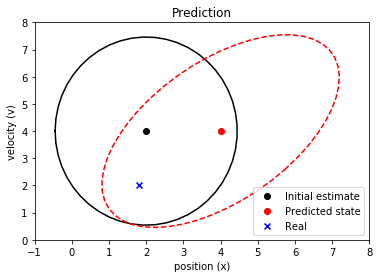

In [5]:
#Predition

x[:, 1] = (F.dot(x[:, 0].reshape((2, 1))) + G * entry[0])[:, 0]
P[:, :, 1] = F.dot(P[:, :, 0]).dot(np.transpose(F)) + V

a, b = calculate_ellipsis(P, 0, P, 1)
plot_prediction_chart(x, x_real, a, b, -1, 8, 0, 8)

### Plotando o gráfico referente ao processo de Correção

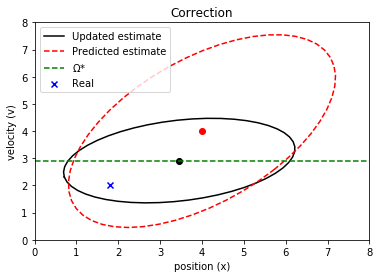

In [6]:
#Correction

K, nu = calculate_gain_and_error(1, x, y, H, P, W)

x_predicted = np.copy(x[:, 1])
P_predicted = np.copy(P[:, :, 1])

x[:, 1] = x[:, 1] + (K * nu).reshape((1, 2))
P[:, :, 1] = P[:, :, 1] - K.dot([H]).dot(P[:, :, 1])

a, b = calculate_ellipsis(P, 1, P_predicted, 0, False)
plot_correction_chart(x, x_predicted, x_real, vel, a, b, 0, 8, 0, 8)


### Plotando os gráficos das 40 Iterações do Filtro de Kalman

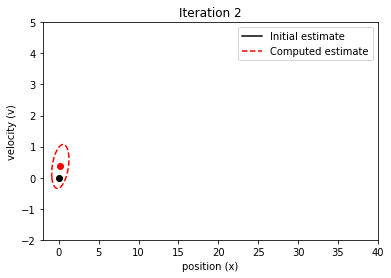

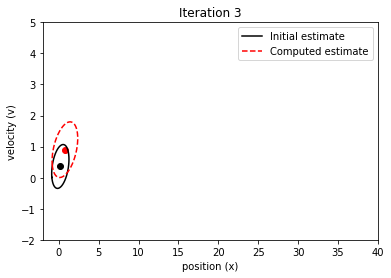

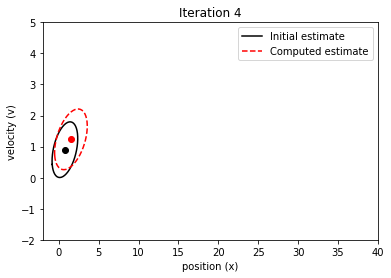

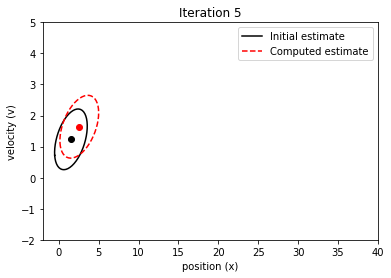

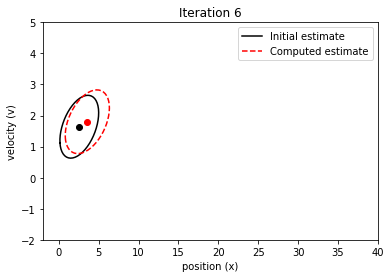

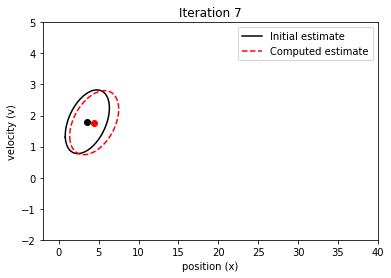

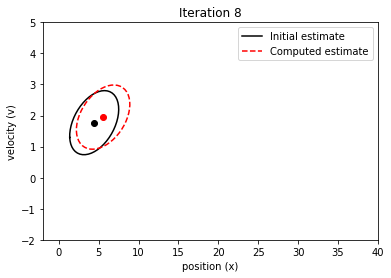

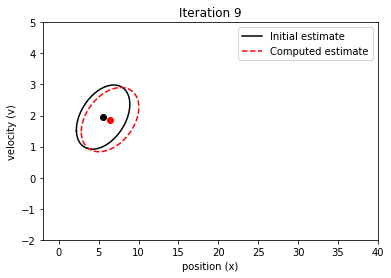

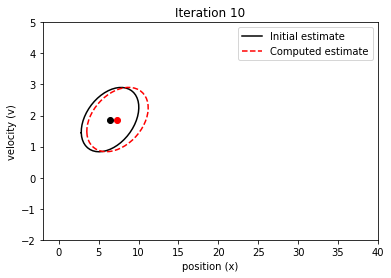

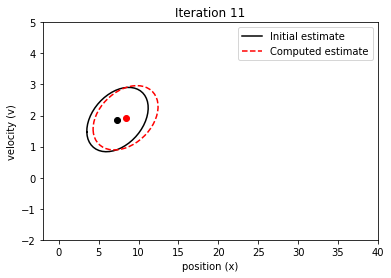

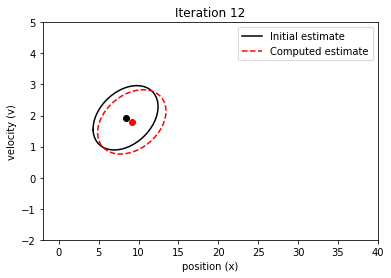

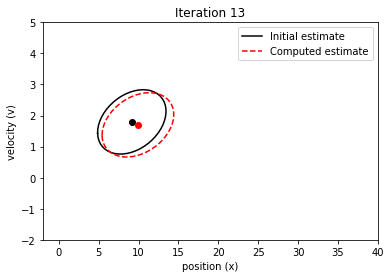

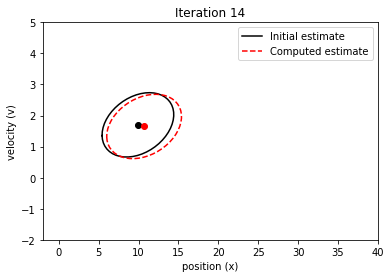

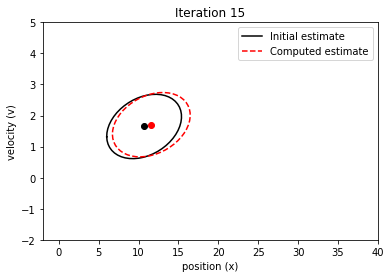

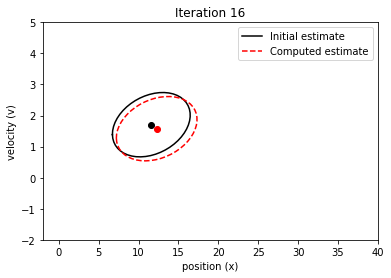

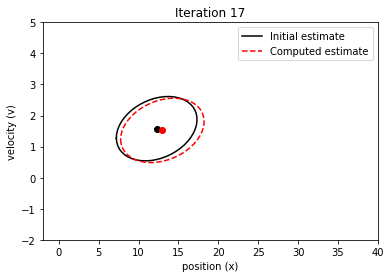

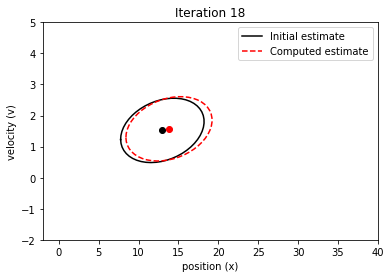

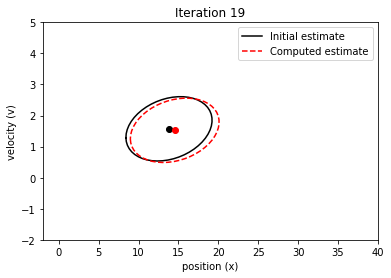

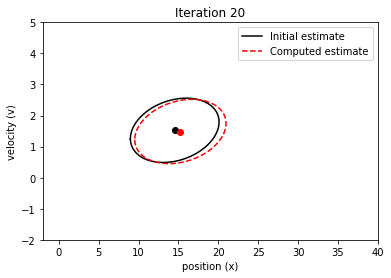

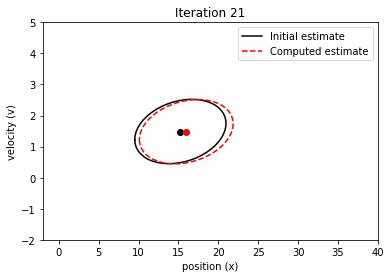

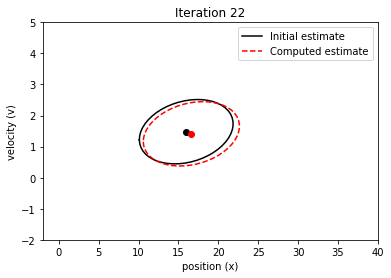

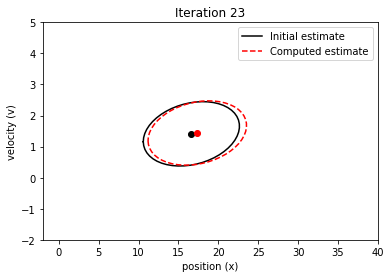

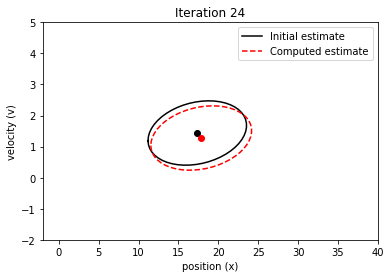

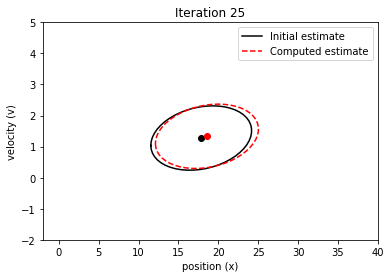

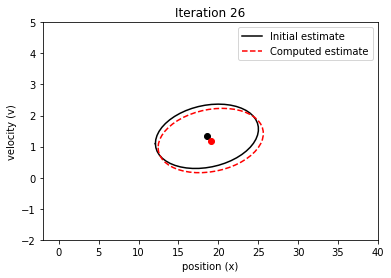

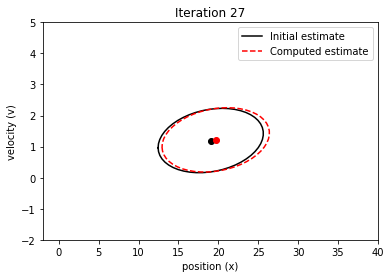

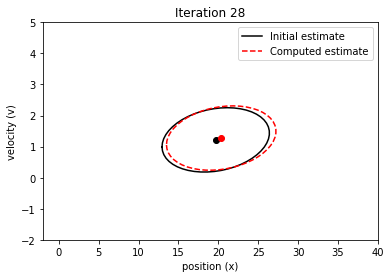

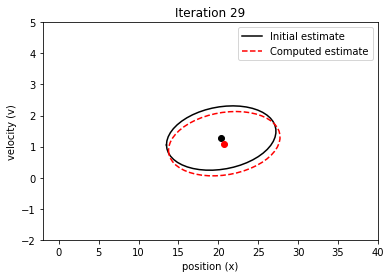

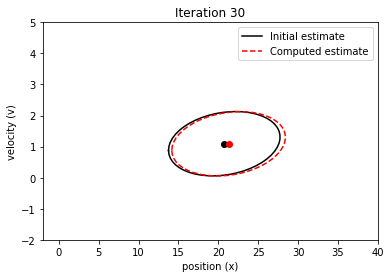

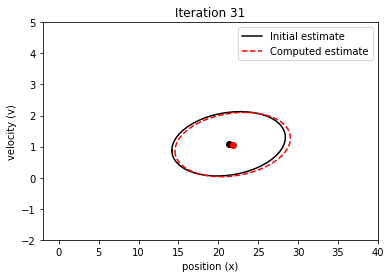

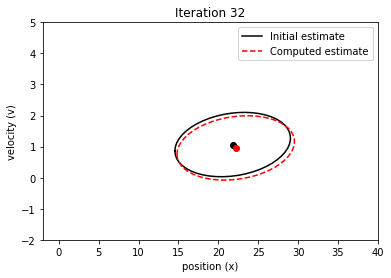

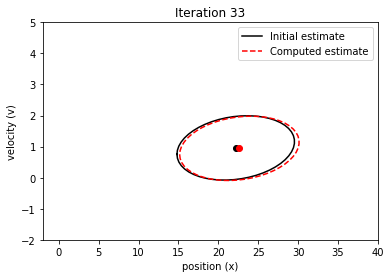

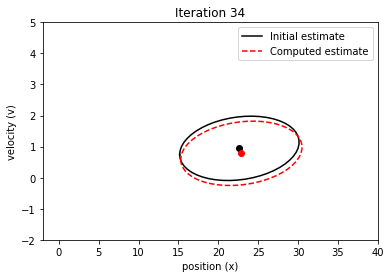

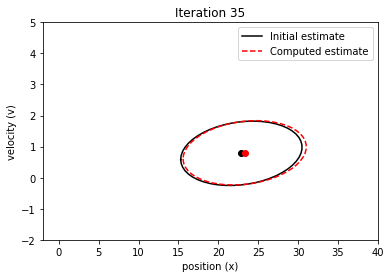

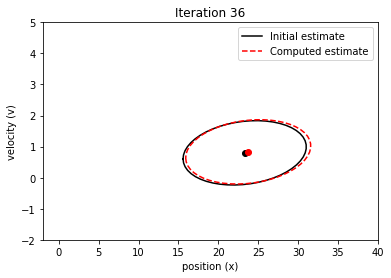

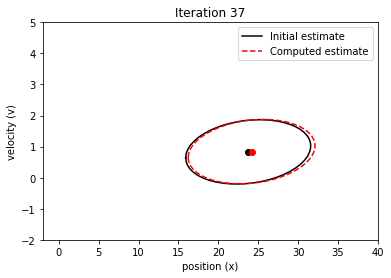

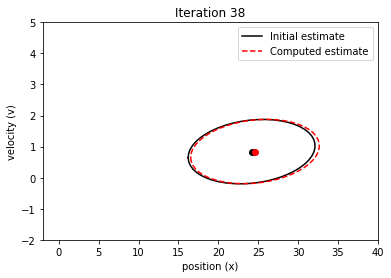

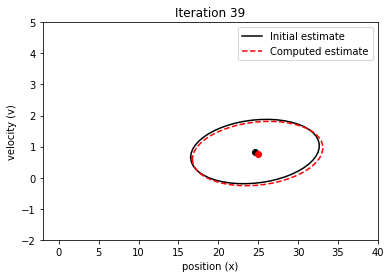

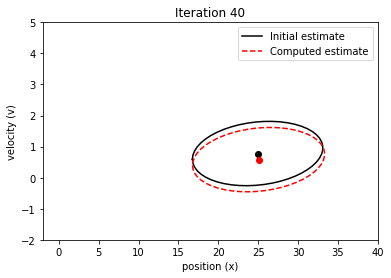

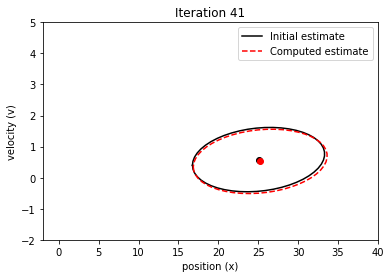

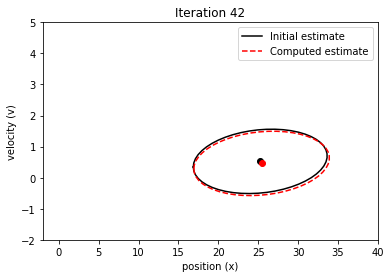

In [15]:
for k in range(2, iterations):
    x[:, k] = (F.dot(x[:, k - 1]) + G * entry[k - 1])[0]
    P[:, :, k] = F.dot(P[:, :, k - 1]).dot(np.transpose(F)) + V

    K, nu = calculate_gain_and_error(k, x, y, H, P, W)

    x[:, k] = x[:, k] + (K * nu).reshape((1, 2))
    P[:, :, k] = P[:, :, k] - K.dot([H]).dot(P[:, :, k])

    a, b = calculate_ellipsis(P, k - 1, P, k)

    plot_iteration_chart(k, x, a, b, -2, 40, -2, 5)
    